In [2]:
#from helpers import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Spotify-Machine-Learning-master/data/data_moods.csv")

In [4]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [5]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [6]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [7]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

<ipython-input-7-2230d3e76bd3>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)


In [8]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Baseline: 78.59% (4.08%)


In [9]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


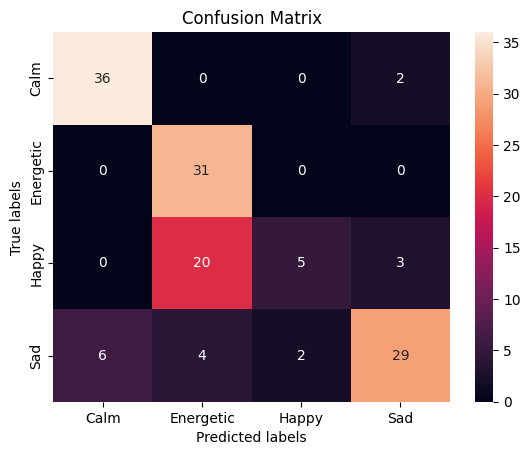

Accuracy Score 0.7318840579710145


In [10]:

cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [13]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 9.1 MB/s eta 0:00:00


In [25]:
# import spotipy
# import time
# from IPython.core.display import clear_output
# from spotipy import SpotifyClientCredentials, util
# from spotipy.oauth2 import SpotifyOAuth


# client_id='3ff80dfa932f42ccba937689112ebaf8'
# client_secret='b222a7c17fda476aa56057b10f263a7d'
# redirect_uri='https://example.com/callback'
# username = 'alifpd'
# scope = 'playlist-modify-public'

# #Credentials to access the Spotify Music Data
# manager = SpotifyClientCredentials(client_id,client_secret)
# sp = spotipy.Spotify(client_credentials_manager=manager)

# #Credentials to access to  the Spotify User's Playlist, Favorite Songs, etc. 
# token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri) 
# spt = spotipy.Spotify(auth=token)

import spotipy
import time
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util
from spotipy.oauth2 import SpotifyOAuth

client_id='masukkan client_id di sini'
client_secret='masukkan client_secret di sini'
redirect_uri='https://example.com/callback'
username = 'masukkan username di sini'
scope = 'playlist-modify-public'

#Credentials to access the Spotify Music Data
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentials to access to  the Spotify User's Playlist, Favorite Songs, etc. 
sp_oauth = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope)
token_info = sp_oauth.get_cached_token()
if not token_info:
    auth_url = sp_oauth.get_authorize_url()
    print(auth_url)
    response = input('Paste the above link into your browser, then paste the redirect url here: ')
    code = sp_oauth.parse_response_code(response)
    token_info = sp_oauth.get_access_token(code)
    token = token_info['access_token']
else:
    token = token_info['access_token']
spt = spotipy.Spotify(auth=token)


def get_albums_id(ids):
    album_ids = []
    results = sp.artist_albums(ids)
    for album in results['items']:
        album_ids.append(album['id'])
    return album_ids

def get_album_songs_id(ids):
    song_ids = []
    results = sp.album_tracks(ids,offset=0)
    for songs in results['items']:
        song_ids.append(songs['id'])
    return song_ids

def get_songs_features(ids):

    meta = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    ids =  meta['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
            energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
    return track,columns

def get_songs_artist_ids_playlist(ids):
    playlist = sp.playlist_tracks(ids)
    songs_id = []
    artists_id = []
    for result in playlist['items']:
        songs_id.append(result['track']['id'])
        for artist in result['track']['artists']:
            artists_id.append(artist['id'])
    return songs_id,artists_id

def download_albums(music_id,artist=False):
    
    if artist == True:
        ids_album = get_albums_id(music_id)
    else:
        if type(music_id) == list:
            ids_album = music_id
        elif type(music_id) == str:
            ids_album = list([music_id])

    tracks = []
    for ids in ids_album:
        #Obtener Ids de canciones en album
        song_ids = get_album_songs_id(ids=ids)
        #Obtener feautres de canciones en album
        ids2 = song_ids
        
        print(f"Album Length: {len(song_ids)}")
         
        time.sleep(.6)   
        track, columns = get_songs_features(ids2)
        tracks.append(track)

        print(f"Song Added: {track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait = True)
        
    clear_output(wait = True)
    print("Music Downloaded!")
 
    return tracks,columns

def download_playlist(id_playlist,n_songs):
    songs_id = []
    tracks = []

    for i in range(0,n_songs,100):
        playlist = spt.playlist_tracks(id_playlist,limit=100,offset=i)
        
        for songs in playlist['items']:
            songs_id.append(songs['track']['id'])
    
    counter = 1
    for ids in songs_id:
        
        time.sleep(.6)
        track,columns = get_songs_features(ids)
        tracks.append(track)

        print(f"Song {counter} Added:")
        print(f"{track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait = True)
        counter+=1
    
    clear_output(wait = True)
    print("Music Downloaded!")

    return tracks,columns

https://accounts.spotify.com/authorize?client_id=3ff80dfa932f42ccba937689112ebaf8&response_type=code&redirect_uri=https%3A%2F%2Fexample.com%2Fcallback&scope=playlist-modify-public
Paste the above link into your browser, then paste the redirect url here: https://example.com/callback?code=AQBgxrr6sPhr9CgpWX3wfyfPRp9zaDSJnXXq1fzPZFUb_u_AYKWynUVrOBG0vh1qBh8iByX2HIHaCzBF3idkINQUjjNCNJvBz2CdSudU8XwgoxUV1OiYZBv8RnqbCbAd-Yius7cyYjBkHmLVbSFJxfg9h1WjxQaA6L90ND_G28mKT101dNmdiLLYfQGr4605BmVqGAOfOIg


<ipython-input-25-b82d73a45d68>:46: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = sp_oauth.get_access_token(code)


In [43]:
df_audio = pd.read_csv("/content/drive/MyDrive/Spotify-Machine-Learning-master/data/audio_features2.csv")
df_audio.head(15)

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,type,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url
0,1,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,1JvbNeV9zG9Sew1JyaWsyx,Anggi Marito,6gO5mDyNTqiIqHItRil4OG,Tak Segampang Itu,2022-12-02,https://api.spotify.com/v1/tracks/26cvTWJq2E1Q...,0.506,...,audio_features,spotify:track:26cvTWJq2E1QqN4jyH2OTU,https://api.spotify.com/v1/tracks/26cvTWJq2E1Q...,https://api.spotify.com/v1/audio-analysis/26cv...,231100,4,pop,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...
1,2,2AaaE0qvFWtyT8srKNfRhH,Komang,5LcNPa8f8bRmZqELgoRFkN,Raim Laode,2N8JUijzZsT2IJnplY4vAE,Komang,2022-08-17,https://api.spotify.com/v1/tracks/2AaaE0qvFWty...,0.696,...,audio_features,spotify:track:2AaaE0qvFWtyT8srKNfRhH,https://api.spotify.com/v1/tracks/2AaaE0qvFWty...,https://api.spotify.com/v1/audio-analysis/2Aaa...,222707,4,other,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...
2,3,6dXiWwFrcGieqnoLYzPNp5,Sial,3wOsYKZM0zcKNasi3I7fP4,Mahalini,6iBh7T1cUR8MPrtly5xugU,fábula,2023-01-23,https://api.spotify.com/v1/tracks/6dXiWwFrcGie...,0.563,...,audio_features,spotify:track:6dXiWwFrcGieqnoLYzPNp5,https://api.spotify.com/v1/tracks/6dXiWwFrcGie...,https://api.spotify.com/v1/audio-analysis/6dXi...,243725,4,pop,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...
3,4,1daDRI9ahBonbWD8YcxOIB,Angels Like You,5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,5BRhg6NSEZOj0BR6Iz56fR,Plastic Hearts,2020-11-27,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,0.672,...,audio_features,spotify:track:1daDRI9ahBonbWD8YcxOIB,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,https://api.spotify.com/v1/audio-analysis/1daD...,196453,4,pop,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...
4,5,5BKJAuVMDyrFvUTo4dIaiK,Not You,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,3KrkQ77DF9OUB0aOzKFYOF,World Of Walker,2021-11-26,https://api.spotify.com/v1/tracks/5BKJAuVMDyrF...,0.573,...,audio_features,spotify:track:5BKJAuVMDyrFvUTo4dIaiK,https://api.spotify.com/v1/tracks/5BKJAuVMDyrF...,https://api.spotify.com/v1/audio-analysis/5BKJ...,153719,4,other,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...
5,6,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,2023-02-24,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,0.783,...,audio_features,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,pop,https://i.scdn.co/image/ab6761610000e5eb1193a0...,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,https://open.spotify.com/artist/4GJ6xDCF5jaUqD...
6,7,3e1rs346dsDDwpqTRGlRZR,Somebody's Pleasure,6ygKuZFz2sRggPZRaLHVHD,Aziz Hedra,5S5vnFRSXVua5SbdoY9S8y,Somebody's Pleasure,2023-01-27,https://api.spotify.com/v1/tracks/3e1rs346dsDD...,0.633,...,audio_features,spotify:track:3e1rs346dsDDwpqTRGlRZR,https://api.spotify.com/v1/tracks/3e1rs346dsDD...,https://api.spotify.com/v1/audio-analysis/3e1r...,223957,4,other,https://i.scdn.co/image/ab6761610000e5ebc7a618...,https://open.spotify.com/track/3e1rs346dsDDwpq...,https://open.spotify.com/artist/6ygKuZFz2sRggP...
7,8,3i0h88q1HBtbdIg2bPxs54,Tertawan Hati,2A7XpBQ8X227lVi5BphdPw,Awdella,3Je4P8ARv9FvEIcOJJXIKl,Tertawan Hati,2022-07-01,https://api.spotify.com/v1/tracks/3i0h88q1HBtb...,0.319,...,audio_features,spotify:track:3i0h88q1HBtbdIg2bPxs54,https://api.spotify.com/v1/tracks/3i0h88q1HBtb...,https://api.spotify.com/v1/audio-analysis/3i

In [29]:
def predict_mood_df(song_id):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = get_songs_features(song_id)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    return mood

In [39]:
df_kecil1 = df_audio.head(10)

In [40]:
df_kecil1['mood'] = df_kecil1['id'].apply(predict_mood_df)

<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_

In [41]:
df_kecil1

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url,mood
0,1,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,1JvbNeV9zG9Sew1JyaWsyx,Anggi Marito,6gO5mDyNTqiIqHItRil4OG,Tak Segampang Itu,2022-12-02,https://api.spotify.com/v1/tracks/26cvTWJq2E1Q...,0.506,...,spotify:track:26cvTWJq2E1QqN4jyH2OTU,https://api.spotify.com/v1/tracks/26cvTWJq2E1Q...,https://api.spotify.com/v1/audio-analysis/26cv...,231100,4,pop,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...,[Sad]
1,2,2AaaE0qvFWtyT8srKNfRhH,Komang,5LcNPa8f8bRmZqELgoRFkN,Raim Laode,2N8JUijzZsT2IJnplY4vAE,Komang,2022-08-17,https://api.spotify.com/v1/tracks/2AaaE0qvFWty...,0.696,...,spotify:track:2AaaE0qvFWtyT8srKNfRhH,https://api.spotify.com/v1/tracks/2AaaE0qvFWty...,https://api.spotify.com/v1/audio-analysis/2Aaa...,222707,4,other,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...,[Sad]
2,3,6dXiWwFrcGieqnoLYzPNp5,Sial,3wOsYKZM0zcKNasi3I7fP4,Mahalini,6iBh7T1cUR8MPrtly5xugU,fábula,2023-01-23,https://api.spotify.com/v1/tracks/6dXiWwFrcGie...,0.563,...,spotify:track:6dXiWwFrcGieqnoLYzPNp5,https://api.spotify.com/v1/tracks/6dXiWwFrcGie...,https://api.spotify.com/v1/audio-analysis/6dXi...,243725,4,pop,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...,[Sad]
3,4,1daDRI9ahBonbWD8YcxOIB,Angels Like You,5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,5BRhg6NSEZOj0BR6Iz56fR,Plastic Hearts,2020-11-27,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,0.672,...,spotify:track:1daDRI9ahBonbWD8YcxOIB,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,https://api.spotify.com/v1/audio-analysis/1daD...,196453,4,pop,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...,[Happy]
4,5,5BKJAuVMDyrFvUTo4dIaiK,Not You,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,3KrkQ77DF9OUB0aOzKFYOF,World Of Walker,2021-11-26,https://api.spotify.com/v1/tracks/5BKJAuVMDyrF...,0.573,...,spotify:track:5BKJAuVMDyrFvUTo4dIaiK,https://api.spotify.com/v1/tracks/5BKJAuVMDyrF...,https://api.spotify.com/v1/audio-analysis/5BKJ...,153719,4,other,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...,[Sad]
5,6,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,2023-02-24,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,0.783,...,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,pop,https://i.scdn.co/image/ab6761610000e5eb1193a0...,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,https://open.spotify.com/artist/4GJ6xDCF5jaUqD...,[Happy]
6,7,3e1rs346dsDDwpqTRGlRZR,Somebody's Pleasure,6ygKuZFz2sRggPZRaLHVHD,Aziz Hedra,5S5vnFRSXVua5SbdoY9S8y,Somebody's Pleasure,2023-01-27,https://api.spotify.com/v1/tracks/3e1rs346dsDD...,0.633,...,spotify:track:3e1rs346dsDDwpqTRGlRZR,https://api.spotify.com/v1/tracks/3e1rs346dsDD...,https://api.spotify.com/v1/audio-analysis/3e1r...,223957,4,other,https://i.scdn.co/image/ab6761610000e5ebc7a618...,https://open.spotify.com/track/3e1rs346dsDDwpq...,https://open.spotify.com/artist/6ygKuZFz2sRggP...,[Sad]
7,8,3i0h88q1HBtbdIg2bPxs54,Tertawan Hati,2A7XpBQ8X227lVi5BphdPw,Awdella,3Je4P8ARv9FvEIcOJJXIKl,Tertawan Hati,2022-07-01,https://api.spotify.com/v1/tracks/3i0h88q1HBtb...,0.319,...,spotify:track:3i0h88q1HBtbdIg2bPxs54,https://api.spotify.com/v1/tracks/3i0h88q1HBtb...,https://api.spotify.com/v1/audio-analysis/3i0h...,237864,4,pop,https://i.scdn.co/image/ab6761610000e5ebf860c4...,https

In [44]:
df_kecil2 = df_audio.iloc[10:21]
df_kecil2['mood'] = df_kecil2['id'].apply(predict_mood_df)

<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_

In [45]:
df_kecil2

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url,mood
10,11,50x1Ic8CaXkYNvjmxe3WXy,Those Eyes,69bG9tC62d8oTFC9aTTosn,New West,7rItmPh0tZpMKcFXBScaU8,Those Eyes,2019-05-10,https://api.spotify.com/v1/tracks/50x1Ic8CaXkY...,0.593,...,spotify:track:50x1Ic8CaXkYNvjmxe3WXy,https://api.spotify.com/v1/tracks/50x1Ic8CaXkY...,https://api.spotify.com/v1/audio-analysis/50x1...,220750,3,indie,https://i.scdn.co/image/ab6761610000e5ebfbf70d...,https://open.spotify.com/track/50x1Ic8CaXkYNvj...,https://open.spotify.com/artist/69bG9tC62d8oTF...,[Sad]
11,12,3AJwUDP919kvQ9QcozQPxg,Yellow,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,6ZG5lRT77aJ3btmArcykra,Parachutes,2000-07-10,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,0.429,...,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4,pop,https://i.scdn.co/image/ab6761610000e5eb989ed0...,https://open.spotify.com/track/3AJwUDP919kvQ9Q...,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,[Energetic]
12,13,78Sw5GDo6AlGwTwanjXbGh,Here With Me,5y8tKLUfMvliMe8IKamR32,d4vd,0OuoHWf8yB0TPzoBWw1R1S,Here With Me,2022-09-22,https://api.spotify.com/v1/tracks/78Sw5GDo6AlG...,0.574,...,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://api.spotify.com/v1/tracks/78Sw5GDo6AlG...,https://api.spotify.com/v1/audio-analysis/78Sw...,242485,4,pop,https://i.scdn.co/image/ab6761610000e5ebad4471...,https://open.spotify.com/track/78Sw5GDo6AlGwTw...,https://open.spotify.com/artist/5y8tKLUfMvliMe...,[Sad]
13,14,6Hii26x3qDErVitnGW8QtO,Runtuh,66NmU5epI0ONGmdCRbLpmW,Feby Putri,5boeKAXsTkdFlm6OnkQxQW,Runtuh,2021-10-01,https://api.spotify.com/v1/tracks/6Hii26x3qDEr...,0.593,...,spotify:track:6Hii26x3qDErVitnGW8QtO,https://api.spotify.com/v1/tracks/6Hii26x3qDEr...,https://api.spotify.com/v1/audio-analysis/6Hii...,223974,4,pop,https://i.scdn.co/image/ab6761610000e5ebab57b1...,https://open.spotify.com/track/6Hii26x3qDErVit...,https://open.spotify.com/artist/66NmU5epI0ONGm...,[Sad]
14,15,3N2WeXxSjngB1DSi8vrI8C,Muak,7G0kstl7VjhDSgFYOBaUS1,Aruma,4Zt66ubcxeKkfB3MvTYvCq,Muak,2022-09-30,https://api.spotify.com/v1/tracks/3N2WeXxSjngB...,0.265,...,spotify:track:3N2WeXxSjngB1DSi8vrI8C,https://api.spotify.com/v1/tracks/3N2WeXxSjngB...,https://api.spotify.com/v1/audio-analysis/3N2W...,264940,4,other,https://i.scdn.co/image/ab6761610000e5ebaae124...,https://open.spotify.com/track/3N2WeXxSjngB1DS...,https://open.spotify.com/artist/7G0kstl7VjhDSg...,[Sad]
15,16,0otRX6Z89qKkHkQ9OqJpKt,Car's Outside,4IWBUUAFIplrNtaOHcJPRM,James Arthur,0cm9LOQUBK3JUgyoRj238z,YOU,2019-10-18,https://api.spotify.com/v1/tracks/0otRX6Z89qKk...,0.338,...,spotify:track:0otRX6Z89qKkHkQ9OqJpKt,https://api.spotify.com/v1/tracks/0otRX6Z89qKk...,https://api.spotify.com/v1/audio-analysis/0otR...,248373,4,pop,https://i.scdn.co/image/ab6761610000e5eb63a65d...,https://open.spotify.com/track/0otRX6Z89qKkHkQ...,https://open.spotify.com/artist/4IWBUUAFIplrNt...,[Happy]
16,17,1mruWrUwAVe2XkksUQiaHK,Selamat (Selamat Tinggal),4bAgr9zaF0bpzVGHdHuf0f,Virgoun,6osB48b3PzrABxdspbyYkd,Selamat (Selamat Tinggal),2019-06-17,https://api.spotify.com/v1/tracks/1mruWrUwAVe2...,0.361,...,spotify:track:1mruWrUwAVe2XkksUQiaHK,https://api.spotify.com/v1/tracks/1mruWrUwAVe2...,https://api.spotify.com/v1/audio-analysis/1mru...,313671,4,pop,https://i.scdn.co/image/ab6761610000e5eba99ec2...,https://open.spotify.com/track/1mruWrUwAVe2Xkk...,https://open.spotify.com/artist/4bAgr9zaF0bpzV...,[Sad]
17,18,5MIpcd16T59wFeqAChSYwC,Duka,1v1khTmozNfxB2ET1Ep288,Last Child,6RUEyCnpcBsm3uSv08NY8q,Duka,2016-09-25,https://api.spotify.com/v1/tracks/5MIpcd16T59w...,0.566,...,spotify:track:5MIpcd16T59wFeqAChSYwC,https://api.spotify.com/v1/tracks/5MIpcd16T59w...,https://api.spotify.com/v1/audio-analysis/5MIp...,325147,4,pop,https://i.scdn.co/image/ab6761610000e5eb4ffc34...,https://open.spotify.com/track/5MIpcd16T59wFeq...,https:/

In [48]:
df_kecil3 = df_audio.iloc[21:30]
df_kecil3['mood'] = df_kecil3['id'].apply(predict_mood_df)

<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_

In [49]:
df_kecil3

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url,mood
21,22,1dQQ2QlnvXUehsRUrukKmf,Right Now,4AK6F7OLvEQ5QYCBNiQWHq,One Direction,7p1fX8aUySrBdx4WSYspOu,Midnight Memories (Deluxe),2013-11-25,https://api.spotify.com/v1/tracks/1dQQ2QlnvXUe...,0.645,...,spotify:track:1dQQ2QlnvXUehsRUrukKmf,https://api.spotify.com/v1/tracks/1dQQ2QlnvXUe...,https://api.spotify.com/v1/audio-analysis/1dQQ...,200400,4,pop,https://i.scdn.co/image/5bb443424a1ad71603c43d...,https://open.spotify.com/track/1dQQ2QlnvXUehsR...,https://open.spotify.com/artist/4AK6F7OLvEQ5QY...,[Energetic]
22,23,6Iq3sgLVrqqZfRitLaeHkn,Sisa Rasa,3wOsYKZM0zcKNasi3I7fP4,Mahalini,6iBh7T1cUR8MPrtly5xugU,fábula,2023-01-23,https://api.spotify.com/v1/tracks/6Iq3sgLVrqqZ...,0.488,...,spotify:track:6Iq3sgLVrqqZfRitLaeHkn,https://api.spotify.com/v1/tracks/6Iq3sgLVrqqZ...,https://api.spotify.com/v1/audio-analysis/6Iq3...,254863,4,pop,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6Iq3sgLVrqqZfRi...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...,[Sad]
23,24,29lBFGkfr7EoJlb3lxi9Ij,Menyesal,7Ln5yumFjHCkeZ8bAzHUcp,Yovie Widianto,13zfefPjKHsxUJm9SZFDtE,Menyesal,2023-03-03,https://api.spotify.com/v1/tracks/29lBFGkfr7Eo...,0.355,...,spotify:track:29lBFGkfr7EoJlb3lxi9Ij,https://api.spotify.com/v1/tracks/29lBFGkfr7Eo...,https://api.spotify.com/v1/audio-analysis/29lB...,203455,4,pop,https://i.scdn.co/image/ab6761610000e5eb5146b8...,https://open.spotify.com/track/29lBFGkfr7EoJlb...,https://open.spotify.com/artist/7Ln5yumFjHCkeZ...,[Sad]
24,25,53fKDMfQhWMSw7QKVDOTBP,Cintanya Aku,0kPb52ySN2k9P6wEZPTUzm,Tiara Andini,2qEHRe3bIRZ1DLyYMmnBK4,Cintanya Aku,2021-01-22,https://api.spotify.com/v1/tracks/53fKDMfQhWMS...,0.516,...,spotify:track:53fKDMfQhWMSw7QKVDOTBP,https://api.spotify.com/v1/tracks/53fKDMfQhWMS...,https://api.spotify.com/v1/audio-analysis/53fK...,234125,4,pop,https://i.scdn.co/image/ab6761610000e5eb28747c...,https://open.spotify.com/track/53fKDMfQhWMSw7Q...,https://open.spotify.com/artist/0kPb52ySN2k9P6...,[Sad]
25,26,1USA6DXJ1qsucoKnDu4vnu,Tak Kan Hilang,6Ifk2cbxyVzT41jLexYCas,Budi Doremi,6JmBf13wUd3kJEdoXgbZy5,Tak Kan Hilang,2022-02-25,https://api.spotify.com/v1/tracks/1USA6DXJ1qsu...,0.527,...,spotify:track:1USA6DXJ1qsucoKnDu4vnu,https://api.spotify.com/v1/tracks/1USA6DXJ1qsu...,https://api.spotify.com/v1/audio-analysis/1USA...,241714,4,pop,https://i.scdn.co/image/ab6761610000e5ebc6abbb...,https://open.spotify.com/track/1USA6DXJ1qsucoK...,https://open.spotify.com/artist/6Ifk2cbxyVzT41...,[Sad]
26,27,22k5lgD5F7Pc7BodEMzDrY,Saat Kau Telah Mengerti,4bAgr9zaF0bpzVGHdHuf0f,Virgoun,2KhCqrXaLVeUNuB8FifMJj,Saat Kau Telah Mengerti,2023-01-13,https://api.spotify.com/v1/tracks/22k5lgD5F7Pc...,0.378,...,spotify:track:22k5lgD5F7Pc7BodEMzDrY,https://api.spotify.com/v1/tracks/22k5lgD5F7Pc...,https://api.spotify.com/v1/audio-analysis/22k5...,290752,4,pop,https://i.scdn.co/image/ab6761610000e5eba99ec2...,https://open.spotify.com/track/22k5lgD5F7Pc7Bo...,https://open.spotify.com/artist/4bAgr9zaF0bpzV...,[Sad]
27,28,2bdVgAQgosGUJoViVDNeOV,LIMBO,3pc0bOVB5whxmD50W79wwO,keshi,1WVIJaAboRSwJOe4u0n0Q7,GABRIEL,2022-03-25,https://api.spotify.com/v1/tracks/2bdVgAQgosGU...,0.577,...,spotify:track:2bdVgAQgosGUJoViVDNeOV,https://api.spotify.com/v1/tracks/2bdVgAQgosGU...,https://api.spotify.com/v1/audio-analysis/2bdV...,212785,4,r&b,https://i.scdn.co/image/ab6761610000e5ebd969cf...,https://open.spotify.com/track/2bdVgAQgosGUJoV...,https://open.spotify.com/artist/3pc0bOVB5whxmD...,[Sad]
28,29,4GfK1qOF3uBWidbPlTCQRL,Monokrom,2iDVt6mFbtbDEZG5ax0dTi,Tulus,4szhn3xPmOJklFAcqNvTnQ,Monokrom,2016-08-03,https://api.spotify.com/v1/tracks/4GfK1qOF3uBW...,0.534,...,spotify:track:4GfK1qOF3uBWidbPlTCQRL,https://api.spotify.com/v1/tracks/4GfK1qOF3uBW...,https://api.spotify.com/v1/audio-analysis/4GfK...,214567,4,pop,https://i.scdn.co/image/ab6761610000e5ebb2dac5...,https://open.s

In [51]:
df_kecil4 = df_audio.iloc[30:40]
df_kecil4['mood'] = df_kecil4['id'].apply(predict_mood_df)

<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_

In [52]:
df_kecil4

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url,mood
30,31,2UgCs0i0rNHUH2jKE5NZHE,Sempurna,4ucwey7FxkHXkLK7jSfevU,Andra & The Backbone,2puZQ79KT5q5RPae7khveD,Andra & The Backbone,2006-12-28,https://api.spotify.com/v1/tracks/2UgCs0i0rNHU...,0.358,...,spotify:track:2UgCs0i0rNHUH2jKE5NZHE,https://api.spotify.com/v1/tracks/2UgCs0i0rNHU...,https://api.spotify.com/v1/audio-analysis/2UgC...,268423,3,rock,https://i.scdn.co/image/ab67616d0000b2738a25f5...,https://open.spotify.com/track/2UgCs0i0rNHUH2j...,https://open.spotify.com/artist/4ucwey7FxkHXkL...,[Sad]
31,32,3TFdXrYIubXABQh0CxIiSs,Asmalibrasi,0YpfUFtmzwNGWjowRwoGel,Soegi Bornean,1geFjIWLQNCKO0Y7uB2Xlw,Asmalibrasi,2019-07-26,https://api.spotify.com/v1/tracks/3TFdXrYIubXA...,0.721,...,spotify:track:3TFdXrYIubXABQh0CxIiSs,https://api.spotify.com/v1/tracks/3TFdXrYIubXA...,https://api.spotify.com/v1/audio-analysis/3TFd...,254862,4,indie,https://i.scdn.co/image/ab6761610000e5eb88ccae...,https://open.spotify.com/track/3TFdXrYIubXABQh...,https://open.spotify.com/artist/0YpfUFtmzwNGWj...,[Sad]
32,33,2hHeGD57S0BcopfVcmehdl,Hati-Hati di Jalan,2iDVt6mFbtbDEZG5ax0dTi,Tulus,3R4IAF9ApqYeUQrv1ddyoR,Manusia,2022-03-03,https://api.spotify.com/v1/tracks/2hHeGD57S0Bc...,0.643,...,spotify:track:2hHeGD57S0BcopfVcmehdl,https://api.spotify.com/v1/tracks/2hHeGD57S0Bc...,https://api.spotify.com/v1/audio-analysis/2hHe...,242000,4,pop,https://i.scdn.co/image/ab6761610000e5ebb2dac5...,https://open.spotify.com/track/2hHeGD57S0Bcopf...,https://open.spotify.com/artist/2iDVt6mFbtbDEZ...,[Sad]
33,34,5O2P9iiztwhomNh8xkR9lJ,Night Changes,4AK6F7OLvEQ5QYCBNiQWHq,One Direction,4gCNyS7pidfK3rKWhB3JOY,FOUR (Deluxe),2014-11-17,https://api.spotify.com/v1/tracks/5O2P9iiztwho...,0.672,...,spotify:track:5O2P9iiztwhomNh8xkR9lJ,https://api.spotify.com/v1/tracks/5O2P9iiztwho...,https://api.spotify.com/v1/audio-analysis/5O2P...,226600,4,pop,https://i.scdn.co/image/5bb443424a1ad71603c43d...,https://open.spotify.com/track/5O2P9iiztwhomNh...,https://open.spotify.com/artist/4AK6F7OLvEQ5QY...,[Sad]
34,35,630DpnzdfjdVqv2yLfPbAX,Bertaut,20zafXaLhm5IcXnSU93rNn,Nadin Amizah,75KyCmWatZRvlMcMRed9BG,Selamat Ulang Tahun,2020-05-28,https://api.spotify.com/v1/tracks/630DpnzdfjdV...,0.470,...,spotify:track:630DpnzdfjdVqv2yLfPbAX,https://api.spotify.com/v1/tracks/630DpnzdfjdV...,https://api.spotify.com/v1/audio-analysis/630D...,315961,3,pop,https://i.scdn.co/image/ab6761610000e5eb8f0388...,https://open.spotify.com/track/630DpnzdfjdVqv2...,https://open.spotify.com/artist/20zafXaLhm5IcX...,[Sad]
35,36,1ZPVEo8RfmrEz8YAD5n6rW,Lantas,3tMTXQyRrPmMyHv5SoC0TV,Juicy Luicy,17vUW6koeUkV58uYfkK6G3,Sentimental,2020-11-06,https://api.spotify.com/v1/tracks/1ZPVEo8RfmrE...,0.588,...,spotify:track:1ZPVEo8RfmrEz8YAD5n6rW,https://api.spotify.com/v1/tracks/1ZPVEo8RfmrE...,https://api.spotify.com/v1/audio-analysis/1ZPV...,234204,4,pop,https://i.scdn.co/image/ab6761610000e5ebbcb780...,https://open.spotify.com/track/1ZPVEo8RfmrEz8Y...,https://open.spotify.com/artist/3tMTXQyRrPmMyH...,[Sad]
36,37,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,78bpIziExqiI9qztvNFlQu,AM,2013-09-09,https://api.spotify.com/v1/tracks/5XeFesFbtLpX...,0.464,...,spotify:track:5XeFesFbtLpXzIVDNQP22n,https://api.spotify.com/v1/tracks/5XeFesFbtLpX...,https://api.spotify.com/v1/audio-analysis/5XeF...,183956,4,rock,https://i.scdn.co/image/ab6761610000e5eb7da39d...,https://open.spotify.com/track/5XeFesFbtLpXzIV...,https://open.spotify.com/artist/7Ln80lUS6He07X...,[Sad]
37,38,1VMtsqCaMNErFRmmvt4exv,Seandainya,1WX2v0BiEW19Vw7xmznLdZ,Vierra,53c9Qg8PfGlJMHZiUz0ysq,Storytelling,2022-02-07,https://api.spotify.com/v1/tracks/1VMtsqCaMNEr...,0.252,...,spotify:track:1VMtsqCaMNErFRmmvt4exv,https://api.spotify.com/v1/tracks/1VMtsqCaMNEr...,https://api.spotify.com/v1/audio-analysis/1VMt...,263467,3,pop,https://i.scdn.co/image/ab6761610000e5ebce05ae...,https

In [54]:
df_kecil5 = df_audio.iloc[40:50]
df_kecil5['mood'] = df_kecil5['id'].apply(predict_mood_df)

<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
<ipython-input-29-3a984e9059b2>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
/usr/local/lib/python3.10/dist-packages/keras/engine/training_

In [55]:
df_kecil5

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url,mood
40,41,2dIBMHByUGcNPzmYBJ6OAj,Evaluasi,51kyrUsAVqUBcoDEMFkX12,Hindia,1DAuVHMlBvIjzWZALSUXbn,Menari Dengan Bayangan,2019-11-29,https://api.spotify.com/v1/tracks/2dIBMHByUGcN...,0.609,...,spotify:track:2dIBMHByUGcNPzmYBJ6OAj,https://api.spotify.com/v1/tracks/2dIBMHByUGcN...,https://api.spotify.com/v1/audio-analysis/2dIB...,194469,4,other,https://i.scdn.co/image/ab6761610000e5eb324cea...,https://open.spotify.com/track/2dIBMHByUGcNPzm...,https://open.spotify.com/artist/51kyrUsAVqUBco...,[Energetic]
41,42,4W4fNrZYkobj539TOWsLO2,Die For You (with Ariana Grande) - Remix,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,35dut3ICqF3NEDkjxfzJJ1,Starboy (Deluxe),2023-03-14,https://api.spotify.com/v1/tracks/4W4fNrZYkobj...,0.575,...,spotify:track:4W4fNrZYkobj539TOWsLO2,https://api.spotify.com/v1/tracks/4W4fNrZYkobj...,https://api.spotify.com/v1/audio-analysis/4W4f...,232857,4,pop,https://i.scdn.co/image/ab6761610000e5eb01b9b4...,https://open.spotify.com/track/4W4fNrZYkobj539...,https://open.spotify.com/artist/1Xyo4u8uXC1ZmM...,[Happy]
42,43,3W4U7TEgILGpq0EmquurtH,Old Love,5kjFzBMHeoAx9xksFSwfUW,yuji,6mKwqGY2IS3qSs3mgs30A5,Old Love,2022-08-19,https://api.spotify.com/v1/tracks/3W4U7TEgILGp...,0.478,...,spotify:track:3W4U7TEgILGpq0EmquurtH,https://api.spotify.com/v1/tracks/3W4U7TEgILGp...,https://api.spotify.com/v1/audio-analysis/3W4U...,249382,3,other,https://i.scdn.co/image/ab6761610000e5eb086a60...,https://open.spotify.com/track/3W4U7TEgILGpq0E...,https://open.spotify.com/artist/5kjFzBMHeoAx9x...,[Sad]
43,44,6T7MAQCekVb3UnCykjX3BP,Disenchanted,7FBcuc1gsnv6Y1nwFtNRCb,My Chemical Romance,0FZK97MXMm5mUQ8mtudjuK,The Black Parade,2006-10-23,https://api.spotify.com/v1/tracks/6T7MAQCekVb3...,0.343,...,spotify:track:6T7MAQCekVb3UnCykjX3BP,https://api.spotify.com/v1/tracks/6T7MAQCekVb3...,https://api.spotify.com/v1/audio-analysis/6T7M...,295000,4,pop,https://i.scdn.co/image/ab6761610000e5eb9c00ad...,https://open.spotify.com/track/6T7MAQCekVb3UnC...,https://open.spotify.com/artist/7FBcuc1gsnv6Y1...,[Energetic]
44,45,6fX8WwxAQ6rCPIC7lMgztu,Kisah Sempurna,3wOsYKZM0zcKNasi3I7fP4,Mahalini,6iBh7T1cUR8MPrtly5xugU,fábula,2023-01-23,https://api.spotify.com/v1/tracks/6fX8WwxAQ6rC...,0.537,...,spotify:track:6fX8WwxAQ6rCPIC7lMgztu,https://api.spotify.com/v1/tracks/6fX8WwxAQ6rC...,https://api.spotify.com/v1/audio-analysis/6fX8...,276019,4,pop,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6fX8WwxAQ6rCPIC...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...,[Sad]
45,46,0zYSfIjxemTi6jvUxGrDHl,Bohongi Hati,3wOsYKZM0zcKNasi3I7fP4,Mahalini,6iBh7T1cUR8MPrtly5xugU,fábula,2023-01-23,https://api.spotify.com/v1/tracks/0zYSfIjxemTi...,0.443,...,spotify:track:0zYSfIjxemTi6jvUxGrDHl,https://api.spotify.com/v1/tracks/0zYSfIjxemTi...,https://api.spotify.com/v1/audio-analysis/0zYS...,262754,4,pop,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/0zYSfIjxemTi6jv...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...,[Sad]
46,47,0bYVPJvXr8ACmw313cVvhB,Tally,41MozSoPIsD1dJM0CLPjZF,BLACKPINK,7jaSNQUBJbvfbZHLNFrV7P,BORN PINK,2022-09-16,https://api.spotify.com/v1/tracks/0bYVPJvXr8AC...,0.688,...,spotify:track:0bYVPJvXr8ACmw313cVvhB,https://api.spotify.com/v1/tracks/0bYVPJvXr8AC...,https://api.spotify.com/v1/audio-analysis/0bYV...,184248,4,pop,https://i.scdn.co/image/ab6761610000e5ebc9690b...,https://open.spotify.com/track/0bYVPJvXr8ACmw3...,https://open.spotify.com/artist/41MozSoPIsD1dJ...,[Happy]
47,48,1ixNEKbIZTTZ5LIz3rr9jD,Cintamu Sepahit Topi Miring,0Pk4JEXgC64RBmovnQDZ27,Jogja Hip Hop Foundation,7nC7NZkREbTAIWuknYkWlP,Semar Mesem Romo Mendem,2013-10-06,https://api.spotify.com/v1/tracks/1ixNEKbIZTTZ...,0.741,...,spotify:track:1ixNEKbIZTTZ5LIz3rr9jD,https://api.spotify.com/v1/tracks/1ixNEKbIZTTZ...,https://api.spotify.com/v1/audio-analysis/1ixN...,294053,4,h

In [56]:
df_audio_concat = pd.concat([df_kecil1, df_kecil2, df_kecil3, df_kecil4, df_kecil5])
df_audio_concat

,numCharts,id,track,artist_id,artist,album_id,album,release_date,link,danceability,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,image,song_url,artist_url,mood
0,1,26cvTWJq2E1QqN4jyH2OTU,Tak Segampang Itu,1JvbNeV9zG9Sew1JyaWsyx,Anggi Marito,6gO5mDyNTqiIqHItRil4OG,Tak Segampang Itu,2022-12-02,https://api.spotify.com/v1/tracks/26cvTWJq2E1Q...,0.506,...,spotify:track:26cvTWJq2E1QqN4jyH2OTU,https://api.spotify.com/v1/tracks/26cvTWJq2E1Q...,https://api.spotify.com/v1/audio-analysis/26cv...,231100,4,pop,https://i.scdn.co/image/ab6761610000e5eb604493...,https://open.spotify.com/track/26cvTWJq2E1QqN4...,https://open.spotify.com/artist/1JvbNeV9zG9Sew...,[Sad]
1,2,2AaaE0qvFWtyT8srKNfRhH,Komang,5LcNPa8f8bRmZqELgoRFkN,Raim Laode,2N8JUijzZsT2IJnplY4vAE,Komang,2022-08-17,https://api.spotify.com/v1/tracks/2AaaE0qvFWty...,0.696,...,spotify:track:2AaaE0qvFWtyT8srKNfRhH,https://api.spotify.com/v1/tracks/2AaaE0qvFWty...,https://api.spotify.com/v1/audio-analysis/2Aaa...,222707,4,other,https://i.scdn.co/image/ab6761610000e5eb8f5fe3...,https://open.spotify.com/track/2AaaE0qvFWtyT8s...,https://open.spotify.com/artist/5LcNPa8f8bRmZq...,[Sad]
2,3,6dXiWwFrcGieqnoLYzPNp5,Sial,3wOsYKZM0zcKNasi3I7fP4,Mahalini,6iBh7T1cUR8MPrtly5xugU,fábula,2023-01-23,https://api.spotify.com/v1/tracks/6dXiWwFrcGie...,0.563,...,spotify:track:6dXiWwFrcGieqnoLYzPNp5,https://api.spotify.com/v1/tracks/6dXiWwFrcGie...,https://api.spotify.com/v1/audio-analysis/6dXi...,243725,4,pop,https://i.scdn.co/image/ab6761610000e5ebb83334...,https://open.spotify.com/track/6dXiWwFrcGieqno...,https://open.spotify.com/artist/3wOsYKZM0zcKNa...,[Sad]
3,4,1daDRI9ahBonbWD8YcxOIB,Angels Like You,5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,5BRhg6NSEZOj0BR6Iz56fR,Plastic Hearts,2020-11-27,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,0.672,...,spotify:track:1daDRI9ahBonbWD8YcxOIB,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,https://api.spotify.com/v1/audio-analysis/1daD...,196453,4,pop,https://i.scdn.co/image/ab6761610000e5eb7e8110...,https://open.spotify.com/track/1daDRI9ahBonbWD...,https://open.spotify.com/artist/5YGY8feqx7naU7...,[Happy]
4,5,5BKJAuVMDyrFvUTo4dIaiK,Not You,7vk5e3vY1uw9plTHJAMwjN,Alan Walker,3KrkQ77DF9OUB0aOzKFYOF,World Of Walker,2021-11-26,https://api.spotify.com/v1/tracks/5BKJAuVMDyrF...,0.573,...,spotify:track:5BKJAuVMDyrFvUTo4dIaiK,https://api.spotify.com/v1/tracks/5BKJAuVMDyrF...,https://api.spotify.com/v1/audio-analysis/5BKJ...,153719,4,other,https://i.scdn.co/image/ab6761610000e5ebbf753c...,https://open.spotify.com/track/5BKJAuVMDyrFvUT...,https://open.spotify.com/artist/7vk5e3vY1uw9pl...,[Sad]
5,6,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,5letLUZIFsQikJYShfGNs4,The Beginning: Cupid,2023-02-24,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,0.783,...,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,pop,https://i.scdn.co/image/ab6761610000e5eb1193a0...,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,https://open.spotify.com/artist/4GJ6xDCF5jaUqD...,[Happy]
6,7,3e1rs346dsDDwpqTRGlRZR,Somebody's Pleasure,6ygKuZFz2sRggPZRaLHVHD,Aziz Hedra,5S5vnFRSXVua5SbdoY9S8y,Somebody's Pleasure,2023-01-27,https://api.spotify.com/v1/tracks/3e1rs346dsDD...,0.633,...,spotify:track:3e1rs346dsDDwpqTRGlRZR,https://api.spotify.com/v1/tracks/3e1rs346dsDD...,https://api.spotify.com/v1/audio-analysis/3e1r...,223957,4,other,https://i.scdn.co/image/ab6761610000e5ebc7a618...,https://open.spotify.com/track/3e1rs346dsDDwpq...,https://open.spotify.com/artist/6ygKuZFz2sRggP...,[Sad]
7,8,3i0h88q1HBtbdIg2bPxs54,Tertawan Hati,2A7XpBQ8X227lVi5BphdPw,Awdella,3Je4P8ARv9FvEIcOJJXIKl,Tertawan Hati,2022-07-01,https://api.spotify.com/v1/tracks/3i0h88q1HBtb...,0.319,...,spotify:track:3i0h88q1HBtbdIg2bPxs54,https://api.spotify.com/v1/tracks/3i0h88q1HBtb...,https://api.spotify.com/v1/audio-analysis/3i0h...,237864,4,pop,https://i.scdn.co/image/ab6761610000e5ebf860c4...,https

In [57]:
df_audio_concat['mood'].value_counts()

[Sad]          34
[Happy]         8
[Energetic]     8
Name: mood, dtype: int64

In [58]:
df_audio_concat.to_csv('audio_features3.csv')